In [1]:
import tensorflow as tf

In [2]:
resnet_notop=tf.keras.applications.resnet50.ResNet50(include_top=False,pooling='avg')
for layers in resnet_notop.layers:
    layers.trainable=False

In [3]:
output_layer=tf.keras.layers.Dense(2,activation='softmax')(resnet_notop.output)

In [4]:
mymodel=tf.keras.Model(inputs=resnet_notop.input,outputs=output_layer)

In [5]:
mymodel.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
%%time
training='D:\\2021_tensorflow\\cats_n_dogs\\train'
validation='D:\\2021_tensorflow\\cats_n_dogs\\validation'
epochs=2

Wall time: 0 ns


In [7]:
%%time
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.resnet50.preprocess_input
    )

datagen_flow_object = datagen.flow_from_directory(
    training,
    target_size=(224, 224),
    batch_size=32
)

r = mymodel.fit_generator(
    datagen_flow_object, epochs=epochs,
    validation_data=datagen.flow_from_directory(validation,
                                                target_size=(224, 224),
                                                batch_size=32)
)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


C:\Users\AbhijitShingote\.conda\envs\tf2.6_092021\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
63/63 [==============================] - 23s 298ms/step - loss: 0.1737 - accuracy: 0.9315 - val_loss: 0.0554 - val_accuracy: 0.9775
Epoch 2/2
63/63 [==============================] - 17s 277ms/step - loss: 0.0396 - accuracy: 0.9885 - val_loss: 0.0425 - val_accuracy: 0.9875
Wall time: 40.9 s


In [8]:
mymodel.evaluate(datagen.flow_from_directory(validation,target_size=(224,224),batch_size=32))

Found 400 images belonging to 2 classes.
13/13 [==============================] - 3s 225ms/step - loss: 0.0425 - accuracy: 0.9875


[0.04253937676548958, 0.987500011920929]

In [9]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img_path = 'cats_n_dogs/validation/dog/10068.jpg'

def check_pred(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    preds = mymodel.predict(x)

    class_dict={value:key for key,value in datagen_flow_object.class_indices.items()}
    print('Predicted:', class_dict[np.argmax(preds)])

Predicted: cat


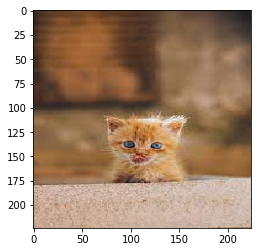

In [10]:
check_pred('testimages/Unknown')

Predicted: cat


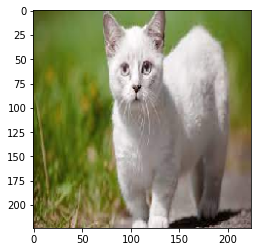

In [11]:
check_pred('testimages/Unknown-2')

Predicted: cat


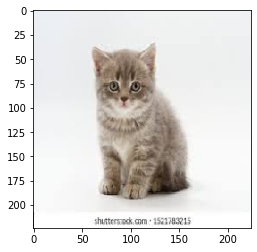

In [12]:
check_pred('testimages/Unknown-3')

Predicted: cat


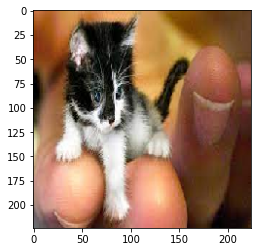

In [13]:
check_pred('testimages/Unknown-4')

Predicted: cat


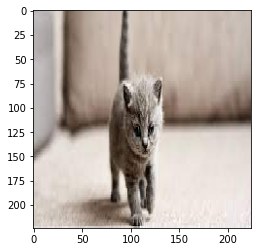

In [14]:
check_pred('testimages/Unknown-5')

Predicted: dog


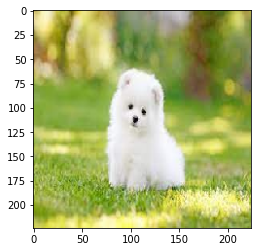

In [15]:
check_pred('testimages/Unknown-6')

Predicted: dog


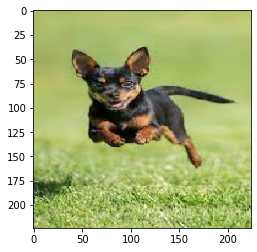

In [16]:
check_pred('testimages/Unknown-7')

Predicted: dog


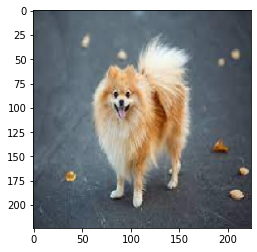

In [17]:
check_pred('testimages/Unknown-8')

Predicted: dog


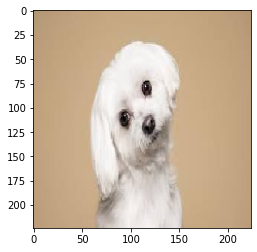

In [18]:
check_pred('testimages/Unknown-9')